# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Aquifer_Petrignano.csv',parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  5223 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              5168 non-null   float64       
 3   Depth_to_Groundwater_P25              5184 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 5025 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 326.6 KB


<ipython-input-90-870d9fb62d26>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/drive/MyDrive/Datasets/Aquifer_Petrignano.csv',parse_dates=['Date'])


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [91]:
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0
...,...,...,...,...,...,...,...,...
5218,2018-01-24,0.0,-27.82,-27.31,5.4,5.3,-29072.736,2.7
5219,2008-02-13,NaN,-31.30,-30.63,NaN,NaN,-32861.376,NaN
5220,2009-06-06,0.0,-27.97,-27.36,22.5,21.4,-31509.216,2.1
5221,2008-03-25,NaN,-31.07,-30.52,NaN,NaN,-27031.104,NaN


In [92]:
df = df.sort_values(by='Date')
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
331,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1525,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
852,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
2448,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
1984,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5083,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4080,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
2092,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5015,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [93]:
df.describe()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,5223,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,2013-05-07 00:00:00,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
min,2006-03-14 00:00:00,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,2009-10-09 12:00:00,0.000000,-28.252500,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,2013-05-07 00:00:00,0.000000,-25.995000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,2016-12-02 12:00:00,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,2020-06-30 00:00:00,67.300000,-18.440000,-19.100000,33.000000,31.100000,0.000000,4.100000
std,NaN,5.217923,3.319188,3.214165,7.794871,7.701369,4751.864371,0.589088


In [94]:
df.isnull()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
331,False,True,False,False,True,True,True,True
1525,False,True,False,False,True,True,True,True
852,False,True,False,False,True,True,True,True
2448,False,True,False,False,True,True,True,True
1984,False,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...
5083,False,False,False,False,False,False,False,False
4080,False,False,False,False,False,False,False,False
2092,False,False,False,False,False,False,False,False
5015,False,False,False,False,False,False,False,False


In [95]:

df_nulls = df[df.isnull()]
#for i in range(len(df_nulls)):
#  print(df_nulls.iloc[i])


#drop the nulls
df = df.dropna()

In [96]:
df_nulls = df[df.isnull()]

In [97]:
df

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
1472,2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
3643,2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2858,2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
1374,2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
3945,2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...,...
5083,2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
4080,2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
2092,2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5015,2020-06-29,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [98]:
df.duplicated().sum()

0

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

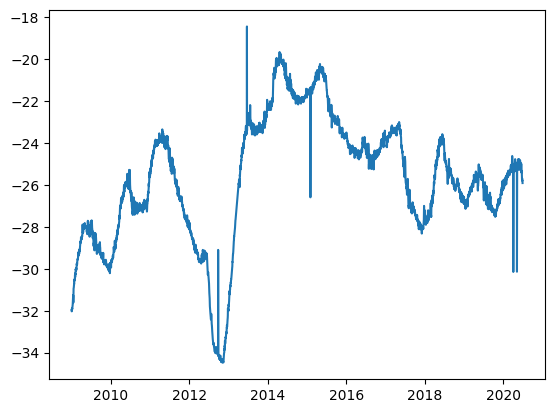

In [99]:
plt.plot(df['Date'],df['Depth_to_Groundwater_P24']) #no clear pattern

In [100]:
df.set_index('Date', inplace=True)

In [101]:
df

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-01-01,0.0,-31.96,-31.14,5.2,4.9,-24530.688,2.4
2009-01-02,0.0,-32.03,-31.11,2.3,2.5,-28785.888,2.5
2009-01-03,0.0,-31.97,-31.07,4.4,3.9,-25766.208,2.4
2009-01-04,0.0,-31.91,-31.05,0.8,0.8,-27919.296,2.4
2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3
...,...,...,...,...,...,...,...
2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4


In [102]:
monthly_data = df.resample('M').mean()
monthly_data

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-01-31,0.203226,-31.278387,-30.503871,4.964516,4.945161,-26695.119484,2.387097
2009-02-28,0.500000,-29.918214,-29.350000,5.125000,4.792857,-25641.174857,2.546429
2009-03-31,1.103226,-29.041613,-28.502903,9.254839,8.716129,-28374.874839,2.490323
2009-04-30,0.543333,-28.229000,-27.736333,13.806667,13.250000,-28167.667200,2.403333
2009-05-31,0.922581,-28.045806,-27.478065,19.809677,18.812903,-32187.288774,2.109677
...,...,...,...,...,...,...,...
2020-02-29,0.641379,-25.523103,-25.261724,8.989655,8.748276,-28354.096552,2.420690
2020-03-31,2.492857,-25.170357,-24.965000,9.689286,9.403571,-26900.362286,2.721429
2020-04-30,1.434483,-25.315517,-24.807586,14.293103,13.796552,-24687.936000,2.496552


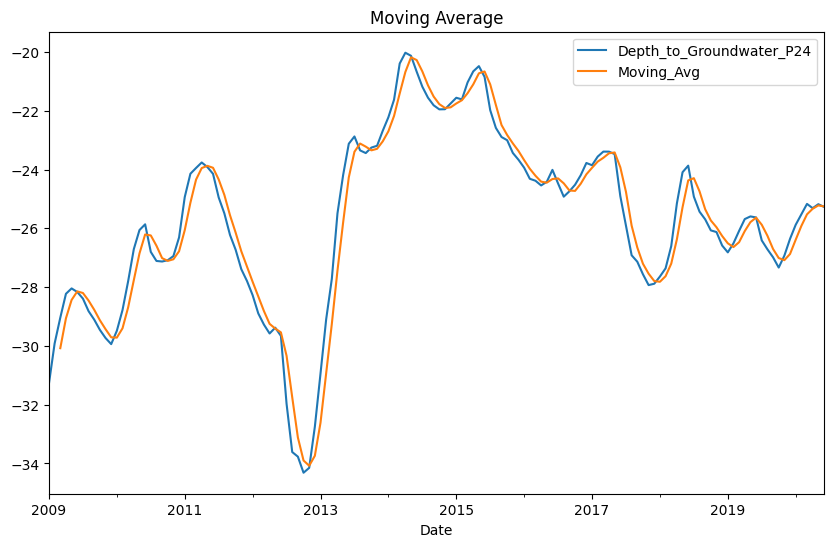

In [103]:
monthly_data['Moving_Avg'] = monthly_data['Depth_to_Groundwater_P24'].rolling(window=3).mean()
monthly_data[['Depth_to_Groundwater_P24', 'Moving_Avg']].plot(figsize=(10, 6))
plt.title('Moving Average')
plt.show()

In [104]:
monthly_data

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Moving_Avg
Date,,,,,,,,
2009-01-31,0.203226,-31.278387,-30.503871,4.964516,4.945161,-26695.119484,2.387097,NaN
2009-02-28,0.500000,-29.918214,-29.350000,5.125000,4.792857,-25641.174857,2.546429,NaN
2009-03-31,1.103226,-29.041613,-28.502903,9.254839,8.716129,-28374.874839,2.490323,-30.079405
2009-04-30,0.543333,-28.229000,-27.736333,13.806667,13.250000,-28167.667200,2.403333,-29.062942
2009-05-31,0.922581,-28.045806,-27.478065,19.809677,18.812903,-32187.288774,2.109677,-28.438806
...,...,...,...,...,...,...,...,...
2020-02-29,0.641379,-25.523103,-25.261724,8.989655,8.748276,-28354.096552,2.420690,-25.921357
2020-03-31,2.492857,-25.170357,-24.965000,9.689286,9.403571,-26900.362286,2.721429,-25.525132
2020-04-30,1.434483,-25.315517,-24.807586,14.293103,13.796552,-24687.936000,2.496552,-25.336326


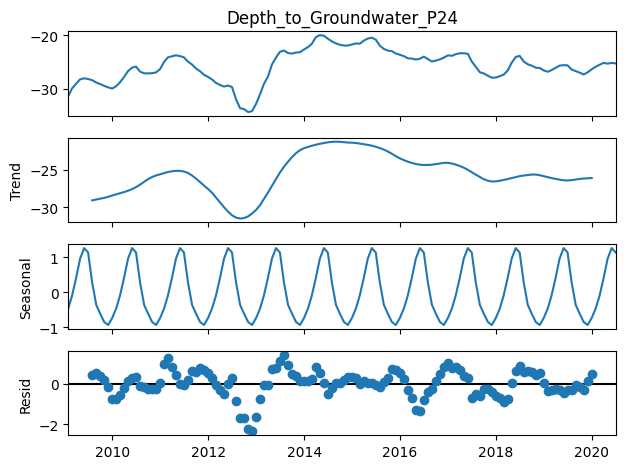

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data['Depth_to_Groundwater_P24'], model='additive')
decomposition.plot()
plt.show()

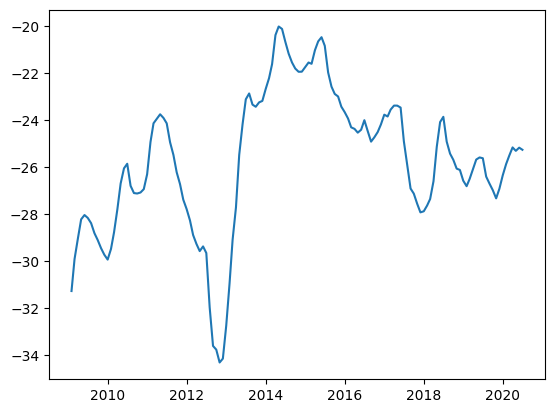

In [106]:
plt.plot(monthly_data['Depth_to_Groundwater_P24']) #no clear pattern

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [107]:
#create 4 lag features
for i in range(1,5):
  df[f'Lag_{i}'] = df['Depth_to_Groundwater_P24'].shift(i)


# 2. Date Features
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Day_of_Year'] = df.index.dayofyear
df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df['Depth_to_Groundwater_P24_Diff'] = df['Depth_to_Groundwater_P24'].diff()
df.dropna(inplace=True)


<ipython-input-107-a3d78be7d334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Lag_{i}'] = df['Depth_to_Groundwater_P24'].shift(i)
<ipython-input-107-a3d78be7d334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Lag_{i}'] = df['Depth_to_Groundwater_P24'].shift(i)
<ipython-input-107-a3d78be7d334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [108]:

df

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Lag_1,Lag_2,Lag_3,Lag_4,Day_of_Week,Month,Day_of_Year,Is_Weekend,Depth_to_Groundwater_P24_Diff
Date,,,,,,,,,,,,,,,,
2009-01-05,0.0,-31.94,-31.01,-1.9,-2.1,-29854.656,2.3,-31.91,-31.97,-32.03,-31.96,0,1,5,0,-0.03
2009-01-06,0.0,-31.89,-31.00,-0.7,-0.7,-29124.576,2.3,-31.94,-31.91,-31.97,-32.03,1,1,6,0,0.05
2009-01-07,0.0,-31.91,-30.96,1.5,-0.3,-31173.120,2.3,-31.89,-31.94,-31.91,-31.97,2,1,7,0,-0.02
2009-01-08,0.0,-31.83,-30.94,4.3,6.6,-30232.224,2.4,-31.91,-31.89,-31.94,-31.91,3,1,8,0,0.08
2009-01-09,0.9,-31.80,-30.93,4.9,4.8,-30597.696,2.3,-31.83,-31.91,-31.89,-31.94,4,1,9,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5,-25.75,-25.67,-25.42,-25.34,4,6,178,0,0.07
2020-06-27,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4,-25.68,-25.75,-25.67,-25.42,5,6,179,1,-0.12
2020-06-28,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4,-25.80,-25.68,-25.75,-25.67,6,6,180,1,0.00


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [109]:
from sklearn.model_selection import train_test_split

X = df.drop('Depth_to_Groundwater_P24', axis=1)
y = df['Depth_to_Groundwater_P24']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



In [112]:
model_RNN = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    SimpleRNN(32),
    Dense(1)
])

model_RNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 64)              │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
model_LSTM = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(32),
    Dense(1)
])

model_LSTM.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 15, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model_RNN.compile(optimizer='adam', loss='mse',metrics=['mse'])
model_LSTM.compile(optimizer='adam', loss='mse',metrics=['mse'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [115]:
history_RNN = model_RNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 3.5956e-04 - val_mse: 3.5956e-04
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.8006e-04 - mse: 7.8006e-04 - val_loss: 5.5982e-04 - val_mse: 5.5982e-04
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8512e-04 - mse: 4.8512e-04 - val_loss: 3.8665e-04 - val_mse: 3.8665e-04
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.8817e-04 - mse: 4.8817e-04 - val_loss: 3.3018e-04 - val_mse: 3.3018e-04
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3260e-04 - mse: 3.3260e-04 - val_loss: 2.5005e-04 - val_mse: 2.5005e-04
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3638e-04 - mse: 3.3638e-04 - val_loss: 5.5650e-04 - val_mse: 5.5650e-04
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3984e-04 - mse: 5.3984e-04 

<Axes: >

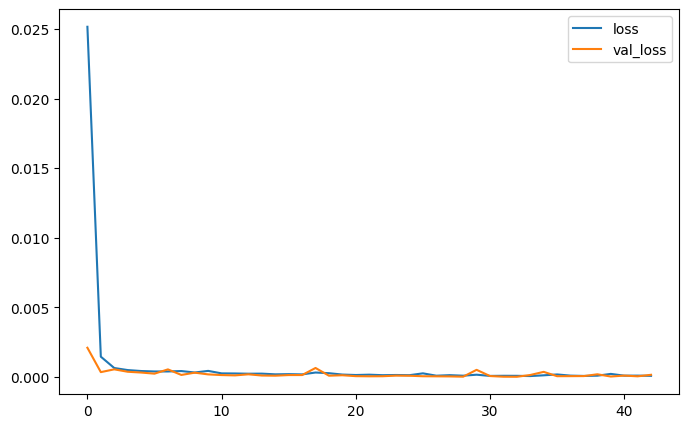

In [117]:
pd.DataFrame(history_RNN.history)[['loss','val_loss']].plot(figsize=(8, 5))

In [118]:
history_LSTM = model_LSTM.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=10)])

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - l

<Axes: >

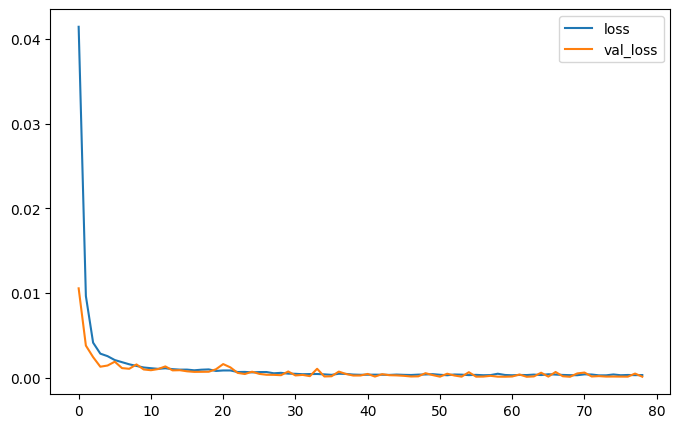

In [119]:
pd.DataFrame(history_LSTM.history)[['loss','val_loss']].plot(figsize=(8, 5))

In [120]:
y_pred_RNN = model_RNN.predict(X_test)
y_pred_LSTM = model_LSTM.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


<Axes: xlabel='Date'>

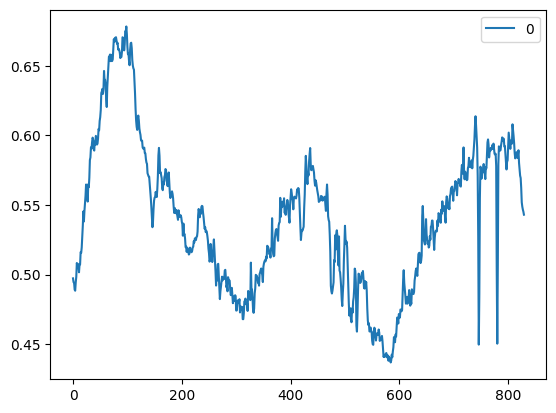

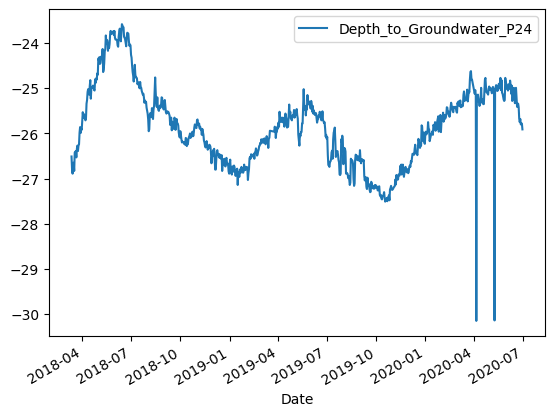

In [122]:
pd.DataFrame(y_pred_LSTM).plot()
pd.DataFrame(y_test).plot()

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.